In [1]:
from numpy import exp, array, random, dot
import numpy
import pandas
import matplotlib.pyplot as plt
from tkinter import *
import tkinter.messagebox


In [2]:
filename = 'irisdata.csv'
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width','output']
data = pandas.read_csv(filename,names=names)
features=4
batch=120
inputMatrix = [[0 for x in range(features)] for y in range(batch)] 
for i in range(batch):
    inputMatrix[i][0]=data['sepal_length'][i]
    inputMatrix[i][1]=data['sepal_width'][i]
    inputMatrix[i][2]=data['petal_length'][i]
    inputMatrix[i][3]=data['petal_width'][i]
output=3
outputMatrix=[]
for i in range(batch):
    if(data['output'][i]=='Iris-setosa'):
        outputMatrix.append([1,0,0])
    elif(data['output'][i]=='Iris-versicolor'):
        outputMatrix.append([0,1,0])
    else:
        outputMatrix.append([0,0,1])

Stage 1: Random starting synaptic weights: 
    Layer 1 (5 neurons, each with 4 inputs): 
[[-0.16595599  0.44064899 -0.99977125 -0.39533485 -0.70648822]
 [-0.81532281 -0.62747958 -0.30887855 -0.20646505  0.07763347]
 [-0.16161097  0.370439   -0.5910955   0.75623487 -0.94522481]
 [ 0.34093502 -0.1653904   0.11737966 -0.71922612 -0.60379702]]
    Layer 2 (3 neuron, with 5 inputs):
[[ 0.60148914  0.93652315 -0.37315164]
 [ 0.38464523  0.7527783   0.78921333]
 [-0.82991158 -0.92189043 -0.66033916]
 [ 0.75628501 -0.80330633 -0.15778475]
 [ 0.91577906  0.06633057  0.38375423]]


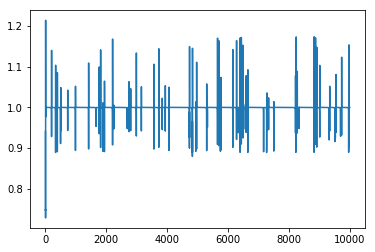

Stage 2: New synaptic weights after training: 
    Layer 1 (5 neurons, each with 4 inputs): 
[[ -1.76760375 -14.87355588   6.62573581  -5.23460832  -1.85036972]
 [ -1.55618307 -10.10448941   4.25246987  -1.03042442  -0.08444809]
 [ -1.50850314  -6.33380383   3.10224718  -5.63440149  -2.6338347 ]
 [ -0.16767822  -1.91666934   1.15931269  -3.02098405  -1.26343401]]
    Layer 2 (3 neuron, with 5 inputs):
[[  0.30242684   0.73424471  -0.68389524]
 [-10.08762943  -6.32530266  -6.95865309]
 [ -7.80196088  -9.13585539  -9.36458521]
 [ -3.90495544  -3.02811439  -2.33525113]
 [ -9.82361099  -2.97466657  -5.49846412]]


In [3]:
class NeuronLayer():
    def __init__(self, number_of_neurons, number_of_inputs_per_neuron):
        self.synaptic_weights = 2 * random.random((number_of_inputs_per_neuron, number_of_neurons)) - 1


class NeuralNetwork():
    def __init__(self, layer1, layer2):
        self.layer1 = layer1
        self.layer2 = layer2
    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))
    def __sigmoid_derivative(self, x):
        return x * (1 - x)
    def train(self, training_set_inputs, training_set_outputs, number_of_training_iterations):
        errorList=[]
        iterations=[]
        for iteration in range(number_of_training_iterations):
            output_from_layer_1, output_from_layer_2 = self.think(training_set_inputs)
            layer2_error = training_set_outputs.T - output_from_layer_2
            layer2_delta = layer2_error * self.__sigmoid_derivative(output_from_layer_2)
            layer1_error = layer2_delta.dot(self.layer2.synaptic_weights.T)
            layer1_delta = layer1_error * self.__sigmoid_derivative(output_from_layer_1)
            layer1_adjustment = training_set_inputs.T.dot(layer1_delta)
            layer2_adjustment = output_from_layer_1.T.dot(layer2_delta)
            self.layer1.synaptic_weights += layer1_adjustment
            self.layer2.synaptic_weights += layer2_adjustment
            error=0.0
            errorSet=0.0
            for i in range(batch):
                for j in range(output):
                    error=(error+layer2_error[i][j]**2)
                errorSet=errorSet+error
                error=0
            errorList.append(errorSet/batch)
            iterations.append(iteration)
        plt.plot(iterations,errorList)
        plt.show()
               
            
        
    def think(self, inputs):
        output_from_layer1 = self.__sigmoid(dot(inputs, self.layer1.synaptic_weights))
        output_from_layer2 = self.__sigmoid(dot(output_from_layer1, self.layer2.synaptic_weights))
        return output_from_layer1, output_from_layer2
    def print_weights(self):
        print ("    Layer 1 (5 neurons, each with 4 inputs): ")
        print (self.layer1.synaptic_weights)
        print ("    Layer 2 (3 neuron, with 5 inputs):")
        print (self.layer2.synaptic_weights)

if __name__ == "__main__":
    random.seed(1)
    layer1 = NeuronLayer(5, 4)
    layer2 = NeuronLayer(3, 5)
    neural_network = NeuralNetwork(layer1, layer2)
    print ("Stage 1: Random starting synaptic weights: ")
    neural_network.print_weights()
    training_set_inputs = array(inputMatrix)
    training_set_outputs = array(outputMatrix).T
    neural_network.train(training_set_inputs, training_set_outputs, 10000)
    print ("Stage 2: New synaptic weights after training: ")
    neural_network.print_weights()   

In [13]:

root = Tk()
root.geometry('500x500')
root.resizable(0, 0)
root.title("Predict Iris Category")

sl=DoubleVar()
sw=DoubleVar()
pl=DoubleVar()
pw=DoubleVar()


def predict():
    lsl=sl.get()
    lsw=sw.get()
    lpl=pl.get()
    lpw=pw.get()    
    feature=[lsl,lsw,lpl,lpw]
    hidden_state, output = neural_network.think(array(feature))
    if output[0]!=0 and output[0]>output[1] and output[0]>output[2]:
        print("Iris-setosa")
        tkinter.messagebox.showinfo("Predictions","Iris-setosa")
    elif output[1]!=0 and output[1]>output[0] and output[1]>output[2]:
        print("Iris-versicolor")
        tkinter.messagebox.showinfo("Predictions","Iris-versicolor")
    else:
        print("Iris-Verginica")
        tkinter.messagebox.showinfo("Predictions","Iris-Verginica")
    
    
label_0 = Label(root, text="Predict Iris flower Category",width=20,font=("bold", 20))
label_0.place(x=90,y=53)

label_1 = Label(root, text="Sepal Length",width=20,font=("bold", 10))
label_1.place(x=80,y=180)
entry_1 = Entry(root,textvar=sl)
entry_1.place(x=240,y=180)

label_2 = Label(root, text="Sepal Width",width=20,font=("bold", 10))
label_2.place(x=80,y=210)
entry_2 = Entry(root,textvar=sw)
entry_2.place(x=240,y=230)

label_3 = Label(root, text="Petal Length",width=20,font=("bold", 10))
label_3.place(x=80,y=260)
entry_3 = Entry(root,textvar=pl)
entry_3.place(x=240,y=290)

label_4 = Label(root, text="Petal Width",width=20,font=("bold", 10))
label_4.place(x=80,y=310)
entry_4 = Entry(root,textvar=pw)
entry_4.place(x=240,y=330)


Button(root, text='Predict',width=20,bg='brown',fg='white',command=predict).place(x=180,y=380)
root.mainloop()



Iris-setosa
